In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.formula.api import ols

In [3]:
# Task 1.

In [4]:
health_data = pd.read_csv("C:/Users/testi/Desktop/excel_files/HealthData.csv")

In [5]:
health_data.head()

,Unnamed: 0,ID,Height,Weight,Syst1,Diast1,Syst2,Diast2,Sex,Mstatus,Income,VaricoseVenes,BMI,Age,Hstatus
0,1,5513,170,80.5,164,92,156,92,1,1,3,1,27.854671,60,2
1,2,5521,163,59.6,132,72,126,68,2,1,6,1,22.432158,36,1
2,3,5590,158,60.0,120,70,120,72,2,1,3,1,24.034610,37,1
3,4,5646,158,57.4,118,66,120,72,2,1,4,1,22.993110,41,1
4,5,5658,165,73.5,170,74,166,80,1,2,1,1,26.997245,42,2


In [6]:
df = health_data[["Syst2", "Age", "Sex"]].copy()

In [7]:
df["Sex"] = df["Sex"].astype("category")

In [8]:
df.dtypes

Syst2       int64
Age         int64
Sex      category
dtype: object

In [9]:
df["Sex"] = np.where(df["Sex"] == 1, "Male", "Female")

In [10]:
df.rename(columns={"Syst2": "Syst"}, inplace=True)

In [11]:
df.head()

,Syst,Age,Sex
0,156,60,Male
1,126,36,Female
2,120,37,Female
3,120,41,Female
4,166,42,Male


In [12]:
# Task 2.

In [13]:
model_syst_vs_age = ols("Syst ~ Age", data=df).fit()

In [14]:
model_syst_vs_age.params

Intercept    109.061884
Age            0.677524
dtype: float64

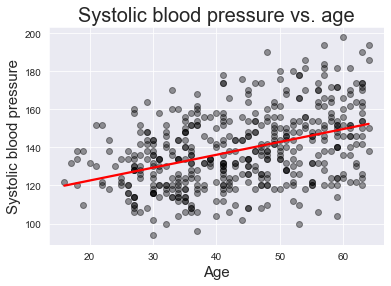

In [15]:
sns.set_style("darkgrid")

sns.regplot(x="Age", 
            y="Syst", 
            ci=None, 
            scatter_kws={"color": "black", "alpha": 0.4},
            line_kws={"color": "red"},
            data=df)

plt.title("Systolic blood pressure vs. age", size=20)
plt.ylabel("Systolic blood pressure", size=15)
plt.xlabel("Age", size=15);

In [16]:
# Task 3.

In [17]:
ml_syst_vs_age_and_sex = ols("Syst ~ Age + Sex + 0", data=df).fit()

In [18]:
ml_syst_vs_age_and_sex.params

Sex[Female]    104.968768
Sex[Male]      111.524226
Age              0.691627
dtype: float64

In [19]:
# Model formula: Syst_i = Beta_0 + Beta_1 * Age_i + Beta_2 * Sex_i + epsilon_i

In [20]:
# Task 4.

In [21]:
# Interpretation of the coefficients from the model ml_syst_vs_age_and_sex:

# A female who's age is zero, is expected to have a systolic blood pressure of 104.968768.
# Like so, a male who's age is zero, is expected to have a systolic blood pressure of 111.524226.
# The slope coefficient Age tells us that when age increases by one unit (year) the exptected raise in the \
# systolic blood pressure is 0.691627.

In [22]:
# Task 5.

In [23]:
# Let's unpack the ml_syst_vs_age_and_sex coefficients into three variables, so we can draw the regression lines for both sexes.

In [24]:
ic_female, ic_male, slope = ml_syst_vs_age_and_sex.params

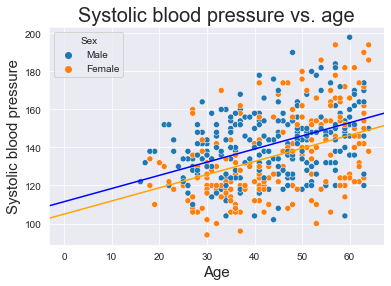

In [25]:
sns.set_style("darkgrid")

sns.scatterplot(x="Age",
                y="Syst",
                hue="Sex",
                data=df)

plt.axline(xy1=(0, ic_female), slope=slope, color="orange")
plt.axline(xy1=(0, ic_male), slope=slope, color="blue")

plt.title("Systolic blood pressure vs. age", size=20)
plt.ylabel("Systolic blood pressure", size=15)
plt.xlabel("Age", size=15);

In [26]:
# Task 6.

In [27]:
ml_syst_vs_age_and_sex.conf_int(alpha=0.05)

,0,1
Sex[Female],98.529007,111.408530
Sex[Male],105.286086,117.762366
Age,0.555828,0.827425


In [28]:
# alpha argument of 0.05 tells that we want the 95 % confidence interval.
# lower boundary of the confidence interval for the corresponding regression coefficient \
# is located in the 0 column and upper boundary is located in the 1 column.

# The confidence intervals for males and females overlap, so we can conclude that the coefficients do not differ \
# significantly from zero. Meaning that the coefficients between the two group do not differ significantly from each other.

In [29]:
# Task 7.

In [30]:
ml_with_interaction = ols("Syst ~ Age * Sex + 0", data=df).fit()

In [31]:
ml_with_interaction.params

Sex[Female]         95.947754
Sex[Male]          120.296550
Age                  0.895710
Age:Sex[T.Male]     -0.408072
dtype: float64

In [32]:
# Syst_female = (95.948 + 0.896 * Age) + (0.896 + (-0.408) * Age) * Sex

In [33]:
# Syst_male = (120.297 + 0.896 * Age) + (0.896 + (-0.408) * Age) Sex

In [ ]:
# Task 8.

In [ ]:
coeffs = ml_with_interaction.params

In [64]:
slope_w_interaction = coeffs[2] + coeffs[3]

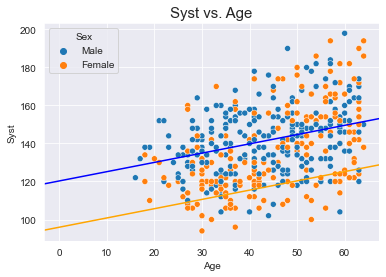

In [68]:
sns.set_style("darkgrid")

sns.scatterplot(x="Age",
                y="Syst",
                hue="Sex",
                data=df)

plt.axline(xy1=(0, coeffs[0]), slope=slope_w_interaction, color="orange")
plt.axline(xy1=(0, coeffs[1]), slope=slope_w_interaction, color="blue")

plt.title("Syst vs. Age", size=15);


In [ ]:
# Nämä regressiosuorat eivät tunnu vastaavaan alla olevia ennusteita. En tiedä, kuinka tuo interaktio-termi vaikuttaa \
# kulmakertoimen arvoon. Tämä ilmeisesti käytiin luennolla, kun en ollut paikalla.

In [34]:
# Task 9.

In [126]:
predict_female = pd.DataFrame({"Age": [30, 45, 60], "Sex": "Female"})
df_conf = ml_with_interaction.get_prediction(predict_female).summary_frame()
df_conf["Age"] = [30, 45, 60]
df_conf["Gender"] = ["Female", "Female", "Female"]
df_conf

# obs_ci_lower is the lower boundary of the prediction interval, and obs_ci_upper is the upper boundary \
# of the prediction interval.

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,Age,Gender
0,122.819043,1.811295,119.259784,126.378302,88.175430,157.462656,30,Female
1,136.254687,1.179523,133.936883,138.572492,101.716537,170.792838,45,Female
2,149.690332,1.931402,145.895059,153.485604,115.021676,184.358988,60,Female


In [125]:
predict_male = pd.DataFrame({"Age": [30, 45, 60], "Sex": "Male"})
df_conf2 = ml_with_interaction.get_prediction(predict_male).summary_frame()
df_conf2["Age"] = [30, 45, 60]
df_conf2["Gender"] = ["Male", "Male", "Male"]
df_conf2

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,Age,Gender
0,134.925694,1.677362,131.629619,138.221769,100.308130,169.543258,30,Male
1,142.240266,1.123685,140.032186,144.448345,107.709305,176.771226,45,Male
2,149.554838,1.984538,145.655150,153.454525,114.874596,184.235079,60,Male


In [ ]:
# Model performance are usually measured by two metrics: R-squared and RSE.

In [129]:
R2 = ml_with_interaction.rsquared
R2

0.20811565504048868

In [131]:
RSE = np.sqrt(ml_with_interaction.mse_resid)
RSE

17.536731222989346

In [ ]:
# Around 21 % of the variance of the dependent variable can be explained by the predictor variables.
# This is not a good result.

# We got an RSE (Residual Standard Error) value of 17.5. This indicated that the true value lies typically 17.5 units (mmHg) \
# away from the regression line. Or in other words; a typical difference between a prediction and an observed response.